### Importing the necessary libraries


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [136]:
data = pd.read_csv("data/TrainAndValid.csv",low_memory=False)

### Reading the CSV and Parsing Date and Time

convert Saledate column from float to datetime


In [137]:
data = pd.read_csv("data/TrainAndValid.csv",low_memory=False,
                  parse_dates=['saledate'])
data

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,2012-01-28,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,2012-03-07,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [138]:
data.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

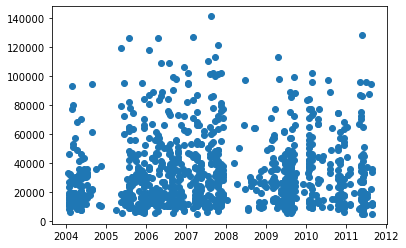

In [139]:
fig, ax= plt.subplots()
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

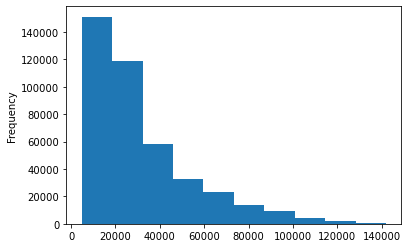

In [140]:
data.SalePrice.plot.hist()

### Sorting the dataset based on `saledate`

In [141]:
data.sort_values(by=['saledate'],inplace = True, ascending = True)


### Creating a copy of the data

In [142]:
data_copy = data.copy()


### Adding year and months as different columns by extracting from the `saledate`

In [143]:
data_copy['SaleYear']=data_copy.saledate.dt.year

data_copy['SaleMonth']=data_copy.saledate.dt.month
data_copy['SaleDay']=data_copy.saledate.dt.day
data_copy['SaleDayOfWeek']=data_copy.saledate.dt.dayofweek


In [144]:
data_copy.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [145]:
data_copy.drop("saledate",axis=1,inplace=True)


    

In [146]:
x=data_copy.state.value_counts()

x.sort_values(ascending=False)

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Plotting the top 10 states with their number of vehicles

<AxesSubplot:>

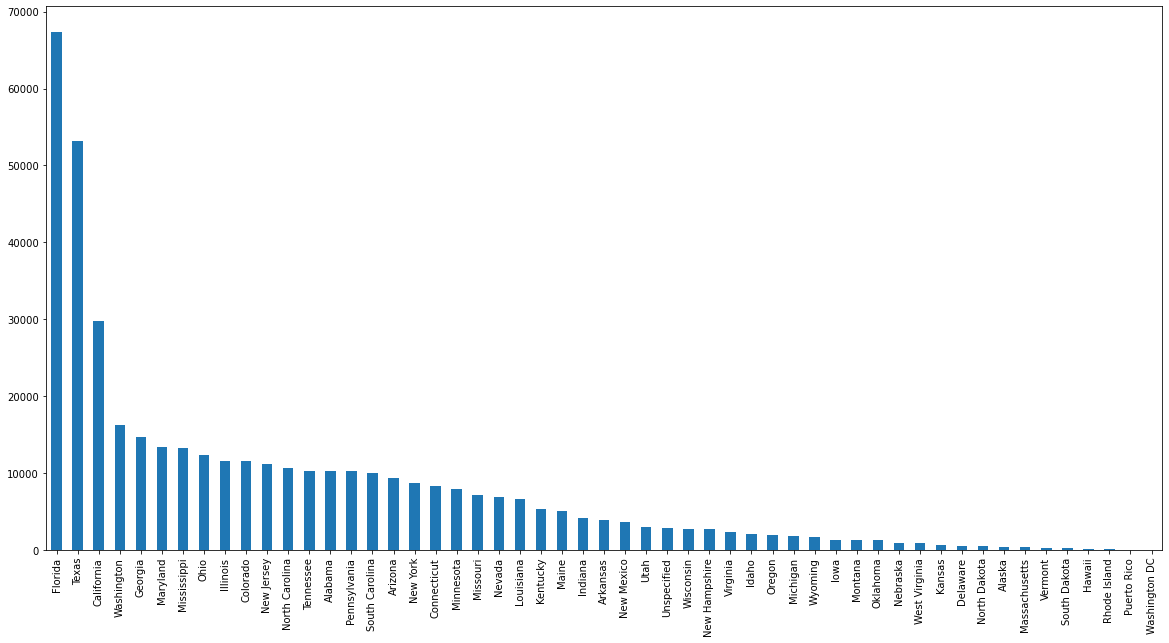

In [147]:
plt.figure(figsize=(20,10))
x.plot.bar()

### Convert strings to categories 

In [148]:
for label, content in data_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Turning string values into category values

In [149]:
for label, content in data_copy.items():
    if pd.api.types.is_string_dtype(content):
        data_copy[label]= content.astype("category").cat.as_ordered()

### Save preprocessed data

In [150]:
data_copy.to_csv('data/train_copy.csv',index = False)

### Filling missing Values

Fill the numerical missing values 

In [151]:
data_copy= pd.read_csv('data/train_copy.csv', low_memory=False)
data_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SaleYear,SaleMonth,SaleDay,SaleDayOfWeek
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1


In [152]:
for label,content, in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek


In [153]:
display(data_copy.auctioneerID)

0         18.0
1         99.0
2         99.0
3         99.0
4         99.0
          ... 
412693    99.0
412694    99.0
412695    99.0
412696    99.0
412697    99.0
Name: auctioneerID, Length: 412698, dtype: float64

In [154]:
for label,content in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
 

auctioneerID
MachineHoursCurrentMeter


### Fill Numeric null values with median

In [155]:
for label,content in data_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Making a different new column to see whether the specific row has a null value or not
            data_copy[label+"is_missing"] = pd.isnull(content)
            data_copy[label]= content.fillna(content.median())
            
            
                
#data_copy['auctioneerID'].where(data_copy['auctioneerID']!=99).dropna()      

**Plotting the number of null values in categorical columns**

<AxesSubplot:>

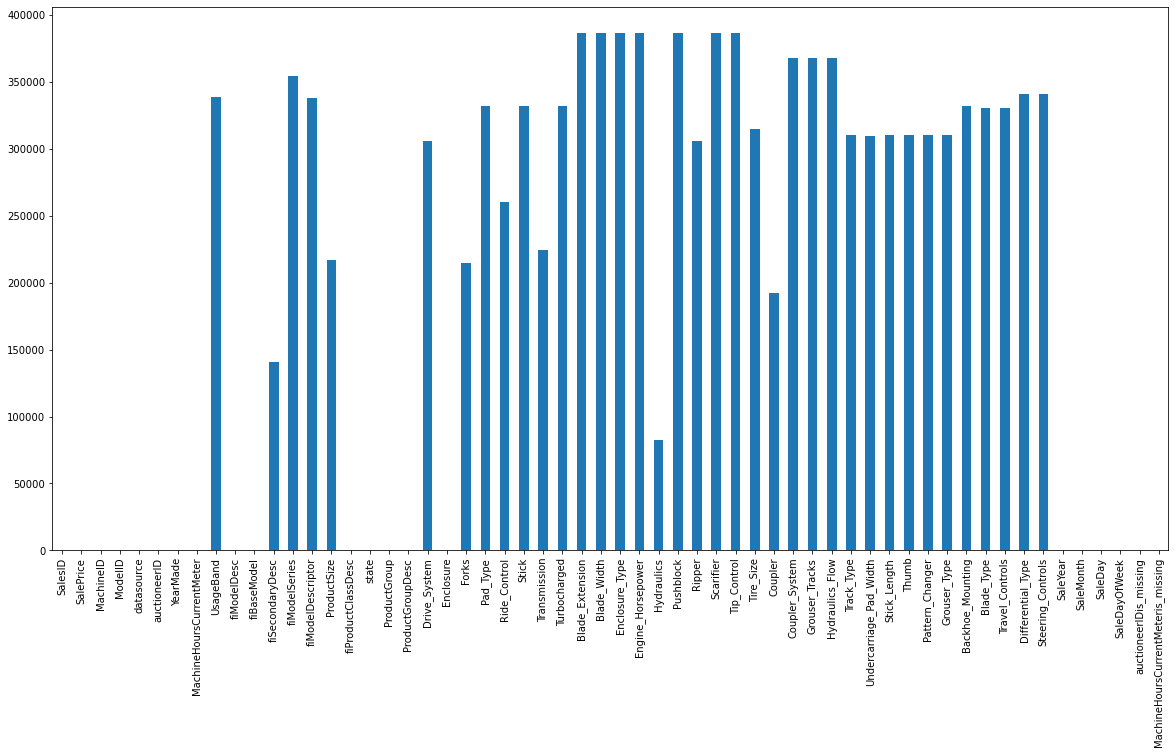

In [156]:
plt.figure(figsize=(20,10))
data_copy.isna().sum().plot.bar()

### Filling missing categorical values

In [157]:
for label,content in data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


### Replacing Categorical values with their respective codes but adding 1 to remove -1 values which are basically null values

In [158]:
for label, content in data_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Lets add a binary column whether it has a missing value
        data_copy[label+'_is_missing']= pd.isnull(content)
        #turn the categories into numbers
        data_copy[label]= pd.Categorical(content).codes + 1

In [159]:
pd.Categorical(data_copy['state']).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

### Seeing whether all null values have been removed 


<AxesSubplot:>

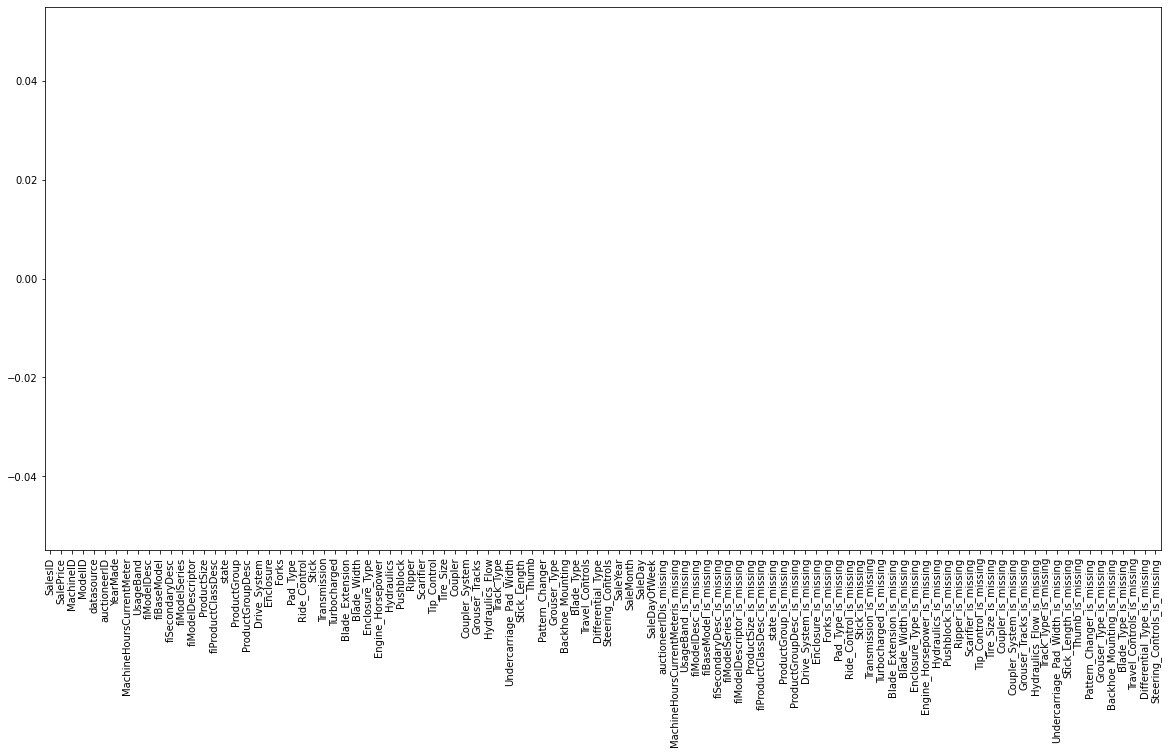

In [161]:
plt.figure(figsize=(20,10))
data_copy.isna().sum().plot.bar()





### Fitting Machine Learning Model 

In [162]:

# Create a model and time it.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,random_state= 99)


train_set = data_copy[data_copy['SaleYear']!=2012]
test_set = data_copy[data_copy.SaleYear==2012]



X_train, y_train =train_set.drop('SalePrice', axis=1), train_set['SalePrice']

X_test, y_test = test_set.drop('SalePrice',axis=1), test_set['SalePrice']

X_train.shape, y_train.shape, X_test.shape, y_test.shape







((401125, 101), (401125,), (11573, 101), (11573,))

### Building our Evaluation Function: RMSLE 



In [163]:
from sklearn.metrics import mean_squared_log_error , mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    """
    Calculates rmsle between predictions and true labels
    
    """
    
    return np.sqrt(mean_squared_log_error(y_test,y_pred))


def show_model_scores(model):
    train_preds = model.predict(X_train)
    val_preds= model.predict(X_test)
    
    score_dict = {"Training MAE": mean_absolute_error(y_train, train_preds),
                  "Valid MAE": mean_absolute_error(y_test, val_preds),
                  "Training RMSLE": rmsle(y_train, train_preds),
                  "Valid RMSLE": rmsle(y_test,val_preds),
                  "Training R^2" : r2_score(y_train, train_preds),
                  "Valid R^2" : r2_score( y_test, val_preds)}
    
    return score_dict
    
    



    

### Using RandomizedSearchCV to find the best hyperparameters for the Random Forest Regressor

In [113]:
"""%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid= {'n_estimators': np.arange(10,200,10),
          'max_depth':[None,3,5,10],
          'min_samples_split': np.arange(2,40,2),
          'min_samples_leaf': np.arange(1,20,2),
          "max_samples": [10000]}


rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=99),
                             param_distributions=rf_grid,
                             n_iter=5,
                             cv=5,
                             verbose = True)


rs_model.fit(X_train,y_train)
"""

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  2.3min finished


Wall time: 2min 26s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=99),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=True)

### Finding the best parameters


In [114]:
#rs_model.best_params_

{'n_estimators': 130,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_depth': None}

### Showing scores using the `rs_model`

In [115]:
#show_model_scores(rs_model)

{'Training MAE': 5833.63210316324,
 'Valid MAE': 7293.494858717896,
 'Training RMSLE': 0.26695163828098983,
 'Valid RMSLE': 0.29446032623592805,
 'Training R^2': 0.8464413021160061,
 'Valid R^2': 0.8236583535620765}

### This is a different model that I got from Udemy Lecture, which is considered to be very optimal


In [164]:
different_ideal_model = RandomForestRegressor(n_estimators= 40,
                                              min_samples_leaf = 1,
                                              min_samples_split= 14,
                                              max_features = 0.5,
                                              n_jobs = -1,
                                              max_samples= None,
                                              random_state= 99)

different_ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=99)

In [165]:
show_model_scores(different_ideal_model)

{'Training MAE': 2991.540909926238,
 'Valid MAE': 5935.963170245619,
 'Training RMSLE': 0.14612289322408228,
 'Valid RMSLE': 0.24391170451123392,
 'Training R^2': 0.9579092516191772,
 'Valid R^2': 0.8808472523058227}

### Reading the Test data and predicting the values


In [168]:
data_test = pd.read_csv('data/Test.csv',low_memory=False, parse_dates= ['saledate'])

data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocess the Test Data


In [169]:
def preprocess(data_copy):
    
    data_copy['SaleYear']=data_copy.saledate.dt.year

    data_copy['SaleMonth']=data_copy.saledate.dt.month
    data_copy['SaleDay']=data_copy.saledate.dt.day
    data_copy['SaleDayOfWeek']=data_copy.saledate.dt.dayofweek
    data_copy.drop("saledate",axis=1,inplace=True)
    
    
    for label, content in data_copy.items():
        if pd.api.types.is_string_dtype(content):
            data_copy[label]= content.astype("category").cat.as_ordered()

    for label,content in data_copy.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Making a different new column to see whether the specific row has a null value or not
                data_copy[label+"is_missing"] = pd.isnull(content)
                data_copy[label]= content.fillna(content.median())

    for label, content in data_copy.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Lets add a binary column whether it has a missing value
            data_copy[label+'_is_missing']= pd.isnull(content)
            #turn the categories into numbers
            data_copy[label]= pd.Categorical(content).codes + 1
            
    return data_copy

    
    
    

In [170]:
preprocess(data_test)


data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [171]:
data_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [172]:
set(data_copy.columns)- set(data_test.columns)

{'SalePrice', 'auctioneerIDis_missing'}

In [173]:
data_test['auctioneerIDis_missing']=False

In [174]:
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerIDis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [175]:
test_prediction = different_ideal_model.predict(data_test)

In [176]:
test_prediction

array([21064.78041954, 22003.59501695, 44290.30809923, ...,
       15435.71778207, 22268.52629616, 32019.75178717])

### Lastly, making it in a `csv` format where the salesID and SalesPrice would be printed from the test data

In [177]:
df_preds = pd.DataFrame()

df_preds['Sales ID']= data_test['SalesID']
df_preds['Predicted Sales Price']= test_prediction

display(df_preds)



,Sales ID,Predicted Sales Price
0,1227829,21064.780420
1,1227844,22003.595017
2,1227847,44290.308099
3,1227848,58889.929445
4,1227863,42322.267343
...,...,...
12452,6643171,44375.121518
12453,6643173,17992.223280
12454,6643184,15435.717782
12455,6643186,22268.526296
